In [3]:
import pandas as pd
import numpy as np


df=pd.read_csv(r"F:\Final_project\df_keyword.csv")

In [5]:
from collections import Counter
import re

# Assume your DataFrame is named 'df' and the column is 'hazard'

# 1. Fill NaNs: Convert missing values to a placeholder string
df['hazard_cleaned'] = df['hazards'].fillna('').astype(str)

# 2. Lowercase: Convert all text to lowercase for consistent counting
df['hazard_cleaned'] = df['hazard_cleaned'].str.lower()

# 3. Basic Cleaning: Remove leading/trailing spaces and non-alphanumeric characters 
#    except for common separators (like space, dot, or hyphen for compound names)
#    We will only focus on replacing noise characters.
df['hazard_cleaned'] = df['hazard_cleaned'].str.strip()
# Remove any non-essential punctuation that isn't part of a compound name
df['hazard_cleaned'] = df['hazard_cleaned'].apply(lambda x: re.sub(r'[^\w\s\.-]', '', x))

In [6]:
# Create a dictionary of term frequencies
hazard_counts = Counter(df[df['hazard_cleaned'] != '']['hazard_cleaned'])


In [8]:
print(hazard_counts)

Counter({'aflatoxin b1  aflatoxin total': 1340, 'ethylene oxide': 884, 'listeria monocytogenes': 736, 'salmonella spp.': 690, 'aflatoxin b1': 561, 'salmonella enteritidis': 521, 'salmonella  enteritidis': 476, 'salmonella': 474, 'chlorpyrifos': 465, 'ochratoxin a': 433, 'mercury': 338, 'salmonella infantis': 313, 'cadmium': 311, 'chlorpyrifos  unauthorised substance': 307, 'pyrrolizidine alkaloids': 245, 'salmonella spp': 239, 'escherichia coli shigatoxin-producing': 221, 'norovirus': 221, 'primary aromatic amines  migration': 197, 'chlorpyrifos-methyl': 197, 'acetamiprid': 171, 'salmonella typhimurium': 162, 'aflatoxin total': 152, 'histamine': 137, 'pesticide residues': 127, 'chlorpyrifos-methyl  unauthorised substance': 117, 'mineral oil': 98, 'chlorate  unauthorised substance': 97, 'tetrahydrocanabinol thc': 88, 'formetanate': 86, 'sulphite  too high content': 86, 'aflatoxins b1': 79, 'prochloraz': 77, 'genetically modified  unauthorised': 75, 'salmonella newport': 74, '2-chloroeth

In [9]:

# Convert the Counter object to a DataFrame for easier inspection
count_df = pd.DataFrame(hazard_counts.items(), columns=['keyword', 'count']).sort_values(by='count', ascending=False)

In [15]:
count_df.head(50)

,keyword,count
7,aflatoxin b1 aflatoxin total,1340
22,ethylene oxide,884
0,listeria monocytogenes,736
12,salmonella spp.,690
15,aflatoxin b1,561
40,salmonella enteritidis,521
1686,salmonella enteritidis,476
2,salmonella,474
360,chlorpyrifos,465
6,ochratoxin a,433


In [49]:
# Create a dictionary to map specific/noisy terms to the desired standardized term (all lowercase)
CONSOLIDATION_MAP = {
    # --- Aflatoxin Consolidation ---
    "aflatoxin b1  aflatoxin total": "aflatoxin",
    "aflatoxin b1": "aflatoxin",
    "aflatoxins": "aflatoxin",
    "aflatoxin total": "aflatoxin",
    "aflatoxin m1": "aflatoxin",
    "aflatoxin b1 aflatoxins b1" : "aflatoxin",
    "aflatoxins b1" : "aflatoxin",
    "aflatoxin b1  aflatoxins b1" : "aflatoxin",
    
    # --- Salmonella Consolidation ---
    "salmonella spp.": "salmonella",
    "salmonella enteritidis": "salmonella",
    "salmonella infantis": "salmonella",
    "salmonella spp": "salmonella",
    "salmonella": "salmonella",
    "salmonella typhimurium" : "salmonella",
    "salmonella  enteritidis" : "salmonella",
    "salmonella newport" : "salmonella",
    
    
    # --- Pesticides/Chemicals Consolidation ---
    "chlorpyrifos unauthorised substance": "chlorpyrifos",
    "chlorpyrifos-methyl": "chlorpyrifos",
    "chlorpyrifos-methyl unauthorised substance" : "chlorpyrifos",
    "chlorpyriphos-ethyl" : "chlorpyrifos",
    "chlorpyrifos  unauthorised substance" : "chlorpyrifos",
    "chlorpyrifos-methyl  unauthorised substance" : "chlorpyrifos",
    
    # --- E. coli Consolidation (if needed) ---
    "escherichia coli shigatoxin-producing": "escherichia coli",
}

In [50]:
# Use the CONSOLIDATION_MAP if a term is found, otherwise keep the original term.
count_df['mapped_keyword'] = count_df['keyword'].apply(
    lambda x: CONSOLIDATION_MAP.get(x, x)
)

In [51]:
consolidated_counts = count_df.groupby('mapped_keyword')['count'].sum().reset_index()

In [52]:
consolidated_counts.columns = ['keyword', 'count']
consolidated_counts = consolidated_counts.sort_values(by='count', ascending=False).reset_index(drop=True)

In [54]:
print("--- Consolidated and Standardized Keyword Counts (Top 20) ---")
print(consolidated_counts.head(20))

--- Consolidated and Standardized Keyword Counts (Top 20) ---
                               keyword  count
0                           salmonella   2949
1                            aflatoxin   2283
2                         chlorpyrifos   1143
3                       ethylene oxide    884
4               listeria monocytogenes    736
5                         ochratoxin a    433
6                              mercury    338
7                              cadmium    311
8                     escherichia coli    282
9              pyrrolizidine alkaloids    245
10                           norovirus    221
11  primary aromatic amines  migration    197
12                         acetamiprid    171
13                           histamine    137
14                  pesticide residues    127
15                         mineral oil     98
16    chlorate  unauthorised substance     97
17             tetrahydrocanabinol thc     88
18          sulphite  too high content     86
19                

In [55]:
consolidated_counts['keyword'].tolist()

['salmonella',
 'aflatoxin',
 'chlorpyrifos',
 'ethylene oxide',
 'listeria monocytogenes',
 'ochratoxin a',
 'mercury',
 'cadmium',
 'escherichia coli',
 'pyrrolizidine alkaloids',
 'norovirus',
 'primary aromatic amines  migration',
 'acetamiprid',
 'histamine',
 'pesticide residues',
 'mineral oil',
 'chlorate  unauthorised substance',
 'tetrahydrocanabinol thc',
 'sulphite  too high content',
 'formetanate',
 'prochloraz',
 'genetically modified  unauthorised',
 '2-chloroethanol',
 'lead  high content',
 'cyanide  too high content',
 'acrylamide  high level',
 'cannabidiol cbd  unauthorised novel food ingredient',
 'sulphite  undeclared',
 'benzoapyrene  polycyclic aromatic hydrocarbons sum of',
 'lead',
 'e220- sulfur dioxide  too high content',
 'flonicamid',
 'glycidyl esters',
 'melamine  migration',
 'moulds  infested with',
 'aflatoxin  aflatoxin b1',
 'ragweed ambrosia spp. seeds  too high content',
 'tricyclazole  unauthorised substance',
 'dimethoate',
 'formaldehyde  migr

In [66]:
# The list of the top 20 standardized keywords (must be lowercase)
TOP_20_HAZARDS = [
    'salmonella', 'aflatoxin', 'chlorpyrifos', 'ethylene oxide', 
    'listeria monocytogenes', 'ochratoxin a', 'mercury', 'cadmium', 
    'escherichia coli', 'pyrrolizidine alkaloids', 'norovirus', 
    'primary aromatic amines migration', 'acetamiprid', 'histamine', 
    'pesticide residues', 'mineral oil', 'chlorate', 
    'tetrahydrocanabinol thc', 'sulphite', 'formetanate'
]

In [67]:
import pandas as pd
import re

# --- Assuming your original DataFrame 'df' with the cleaned text is available ---
# If not, ensure you run this cleaning step first:
df['hazard_text'] = df['hazards'].fillna('').astype(str).str.lower()
df['hazard_text'] = df['hazard_text'].apply(lambda x: re.sub(r'[^\w\s\.-]', ' ', x))


def assign_single_hazard_refined(text, hazard_list):
    """
    Assigns the single, highest-priority hazard found in the text.
    If no Top 20 hazard is found, it returns the original text string.
    
    Args:
        text (str): The cleaned, lowercased hazard text (e.g., 'aflatoxin b1').
        hazard_list (list): The ordered list of Top 20 keywords.
        
    Returns:
        str: The assigned Top 20 keyword, or the original 'text' if no match is found.
    """
    # Safety check for empty or non-string input
    if not isinstance(text, str) or len(text) == 0:
        # It's best practice to return an empty string for missing data, 
        # as it simplifies subsequent string operations.
        return ''
    
    # Iterate through the list in order (prioritization)
    for hazard in hazard_list:
        # 1. Clean the text and the hazard for comparison (remove spaces, dots)
        cleaned_text = text.replace(' ', '').replace('.', '')
        search_term = hazard.replace(' ', '').replace('.', '')
        
        # 2. Check for inclusion
        if search_term in cleaned_text:
            # Return the standardized, clean keyword immediately upon first match
            return hazard
            
    # CRITICAL CHANGE: If no match is found, return the original text
    return text

# Apply the new mapping function
df['simplified_hazard'] = df['hazard_text'].apply(
    lambda x: assign_single_hazard_refined(x, TOP_20_HAZARDS)
)

In [68]:
df['simplified_hazard'].groupby

<bound method Series.groupby of 0                               
1                               
2                               
3         listeria monocytogenes
4              not in catalogue 
                  ...           
27392    formaldehyde  migration
27393                 salmonella
27394              fosthiazate  
27395                  aflatoxin
27396                  aflatoxin
Name: simplified_hazard, Length: 27397, dtype: object>

In [69]:
# Count the occurrences of each category in the new column
hazard_counts_final = df['simplified_hazard'].value_counts().reset_index()

# Rename the columns for clarity
hazard_counts_final.columns = ['simplified_hazard', 'count']

# Print the final distribution
print(hazard_counts_final)

                                      simplified_hazard  count
0                                                         7156
1                                            salmonella   4037
2                                             aflatoxin   2510
3                                          chlorpyrifos   1650
4                                        ethylene oxide    932
...                                                 ...    ...
1637                            methomyl   thiodicarb        1
1638  iron   manganese  migration migration overall ...      1
1639  acephate  unauthorised substance methamidophos...      1
1640  fenbutatin oxide  unauthorised substance fenva...      1
1641  carbendazim  unauthorised substance pyridaben ...      1

[1642 rows x 2 columns]


In [74]:
df['simplified_hazard'].value_counts().reset_index()

,simplified_hazard,count
0,,7156
1,salmonella,4037
2,aflatoxin,2510
3,chlorpyrifos,1650
4,ethylene oxide,932
...,...,...
1637,methomyl thiodicarb,1
1638,iron manganese migration migration overall ...,1
1639,acephate unauthorised substance methamidophos...,1
1640,fenbutatin oxide unauthorised substance fenva...,1


In [70]:
# Find all rows that were not mapped to a Top 20 hazard
unmapped_hazards = df[~df['simplified_hazard'].isin(TOP_20_HAZARDS)]

In [72]:
unmapped_hazards['simplified_hazard'].value_counts().reset_index()

,simplified_hazard,count
0,,7156
1,prochloraz,77
2,genetically modified unauthorised,75
3,2-chloroethanol,74
4,lead high content,70
...,...,...
1617,colour e 143 - fast green fcf fd c green una...,1
1618,formaldehyde migration labelling absence lab...,1
1619,fenbutatin oxide unauthorised substance fenva...,1
1620,cannabidiol cbd unauthorised novel food ing...,1


In [75]:
%pip install spacy

   ---------------------------------------- 0.0/14.2 MB ? eta -:--:--
   --- ------------------------------------ 1.3/14.2 MB 7.2 MB/s eta 0:00:02
   ------- -------------------------------- 2.6/14.2 MB 7.0 MB/s eta 0:00:02
   ----------- ---------------------------- 4.2/14.2 MB 6.9 MB/s eta 0:00:02
   ------------------------- -------------- 9.2/14.2 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------  14.2/14.2 MB 14.1 MB/s eta 0:00:01
   ---------------------------------------- 14.2/14.2 MB 13.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/653.1 kB ? eta -:--:--
   --------------------------------------- 653.1/653.1 kB 19.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 26.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 6.2/6.2 MB 30.8 MB/s eta 0:00:00

   ----- ----------

In [80]:
import pandas as pd
import spacy
from spacy.matcher import PhraseMatcher
import re
import numpy as np

# --- 0. Setup and Data Simulation (REPLACE WITH YOUR ACTUAL DATA LOADING) ---
# NOTE: The provided 'data' is only a small sample. You must ensure your full 
# DataFrame 'df' containing the 'subject' and the pre-calculated 'simplified_hazard' 
# columns is loaded before running this code.

# --- 1. Define the Hazard List from df['simplified_hazard'] ---

# Get the top 30 unique, non-empty, and non-generic hazard names
# We exclude potential non-hazard placeholders like 'Other/None', 'Regulatory issue only', and empty strings.
EXCLUDE_TERMS = ['other/none', 'regulatory issue only', '']

# Calculate the frequency of simplified hazards and extract the top 30 indices (keywords)
# .index is used to grab the hazard name itself
top_30_keywords = (
    df[~df['simplified_hazard'].isin(EXCLUDE_TERMS)]
    ['simplified_hazard']
    .value_counts()
    .head(30)
    .index
    .tolist()
)

# Convert the pandas index to a list and ensure all are lowercase (though they should be)
HAZARD_LIST = [str(k).lower() for k in top_30_keywords]
print(f"Hazard List created with {len(HAZARD_LIST)} unique keywords.")
print("Keywords:", HAZARD_LIST)

# --- 2. Keyword Extraction Function ---

def extract_hazard_keywords(df, subject_col, hazard_list):
    """
    Uses spaCy's PhraseMatcher to efficiently find hazard keywords in the subject text.
    
    Args:
        df (pd.DataFrame): The input DataFrame.
        subject_col (str): The name of the column containing the subject text.
        hazard_list (list): A list of strings containing known hazards (all lowercase).
        
    Returns:
        pd.Series: A new Series containing a list of extracted keywords for each row.
    """
    
    print("Loading spaCy model...")
    try:
        # Disable unnecessary pipes for speed
        nlp = spacy.load("en_core_web_sm", disable=["parser", "ner", "tagger"])
    except OSError:
        # Handle case where model is not installed
        print("Error: spaCy 'en_core_web_sm' model not found. Run: python -m spacy download en_core_web_sm")
        return pd.Series([[]] * len(df))
    
    # Initialize the PhraseMatcher
    # attr="LOWER" ensures case-insensitive matching
    matcher = PhraseMatcher(nlp.vocab, attr="LOWER") 
    
    # Convert the hazard list into spaCy Docs for the matcher
    patterns = [nlp.make_doc(text) for text in hazard_list]
    matcher.add("HAZARD_KEYWORDS", patterns)
    
    extracted_keywords = []
    
    print("Starting keyword matching on 'subject' column...")
    # Process the subject column efficiently using nlp.pipe
    for doc in nlp.pipe(df[subject_col]):
        matches = matcher(doc)
        
        # Get the unique text of the matched spans
        found_keywords = set()
        for match_id, start, end in matches:
            span = doc[start:end]
            # Use lower() to keep the feature names standardized
            found_keywords.add(span.text.lower()) 
            
        extracted_keywords.append(list(found_keywords))
        
    print("Matching complete.")
    return pd.Series(extracted_keywords)

# --- 3. Run the Extraction ---

df['extracted_hazard_keywords'] = extract_hazard_keywords(df, 'subject', HAZARD_LIST)

Hazard List created with 30 unique keywords.
Keywords: ['salmonella', 'aflatoxin', 'chlorpyrifos', 'ethylene oxide', 'listeria monocytogenes', 'ochratoxin a', 'escherichia coli', 'cadmium', 'mercury', 'acetamiprid', 'pyrrolizidine alkaloids', 'norovirus', 'primary aromatic amines migration', 'sulphite', 'histamine', 'mineral oil', 'pesticide residues', 'tetrahydrocanabinol thc', 'chlorate', 'formetanate', 'prochloraz  ', 'genetically modified  unauthorised', '2-chloroethanol  ', 'lead  high content', 'cyanide  too high content', 'acrylamide  high level', 'cannabidiol  cbd   unauthorised novel food ingredient', 'benzo a pyrene   polycyclic aromatic hydrocarbons sum of ', 'lead  ', 'e220- sulfur dioxide  too high content']
Loading spaCy model...
Starting keyword matching on 'subject' column...


c:\Users\SAMSUNG\anaconda3\Lib\site-packages\spacy\pipeline\lemmatizer.py:188: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


Matching complete.


In [85]:
df['extracted_hazard_keywords'].value_counts()

extracted_hazard_keywords
[]                                                      16583
[salmonella]                                             4103
[chlorpyrifos]                                           1181
[ethylene oxide]                                          992
[aflatoxin]                                               921
[listeria monocytogenes]                                  706
[pesticide residues]                                      423
[cadmium]                                                 346
[ochratoxin a]                                            345
[mercury]                                                 303
[norovirus]                                               260
[acetamiprid]                                             229
[pyrrolizidine alkaloids]                                 214
[escherichia coli]                                        165
[histamine]                                               149
[sulphite]                                  

In [86]:
df.head()

,reference,category,type,subject,date,notifying_country,classification,risk_decision,distribution,forAttention,...,hazards,year,month,Hazard_Type,Regulatory_Issue_Flag,hazard_cleaned,hazard_text,detected_keywords,simplified_hazard,extracted_hazard_keywords
0,2025.8491,meat and meat products (other than poultry),food,Suspected Salmonella i beef and hamburgers fro...,2025-10-31 16:30:35,Sweden,information notification for follow-up,potential risk,"Denmark,Sweden",NaN,...,NaN,2025,10,Microbiological,0,,,[],,[salmonella]
1,2025.8490,feed materials,feed,DNA przeżuwaczy w materiale paszowym dla świń ...,2025-10-31 16:24:06,Poland,information notification for follow-up,potential risk,NaN,"Belgium,Poland",...,NaN,2025,10,Others,0,,,[],,[]
2,2025.8488,"dietetic foods, food supplements and fortified...",food,Food supplements from USA containing prohibite...,2025-10-31 16:01:46,Ireland,information notification for attention,potential risk,Ireland,"INFOSAN,United States",...,NaN,2025,10,Chemical/Contaminants,1,,,[],,[]
3,2025.8487,meat and meat products (other than poultry),food,Presence of Listeria monocytogenes ST 451 in d...,2025-10-31 15:55:06,Italy,alert notification,serious,"Austria,Germany,Italy,Netherlands,Slovenia",NaN,...,Listeria monocytogenes,2025,10,Microbiological,0,listeria monocytogenes,listeria monocytogenes,[listeria monocytogenes],listeria monocytogenes,[listeria monocytogenes]
4,2025.8486,"dietetic foods, food supplements and fortified...",food,Food supplement with novel food ingredient fro...,2025-10-31 15:48:56,Austria,information notification for attention,potential risk,NaN,"Austria,Ireland,United Kingdom",...,not in catalogue,2025,10,Novel/Unauthorised Ingredient,0,not in catalogue,not in catalogue,[],not in catalogue,[]


In [92]:
df.to_csv('df_keyword.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'df_keyword.csv'

In [16]:
import pandas as pd

df=pd.read_csv(r"F:\Final_project\df_keyword.csv")

In [19]:
df['simplified_hazard'].isna().sum()

np.int64(7156)

In [23]:
df['simplified_hazard'].value_counts(dropna=False).head(20)

simplified_hazard
NaN                                  7156
salmonella                           4037
aflatoxin                            2510
chlorpyrifos                         1650
ethylene oxide                        932
listeria monocytogenes                751
ochratoxin a                          438
escherichia coli                      390
cadmium                               359
mercury                               353
acetamiprid                           333
pyrrolizidine alkaloids               248
norovirus                             222
primary aromatic amines migration     198
sulphite                              189
histamine                             149
mineral oil                           147
pesticide residues                    135
tetrahydrocanabinol thc               130
chlorate                              114
Name: count, dtype: int64

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_16932\4023236196.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hazards.values, y=top_hazards.index, palette='Spectral')


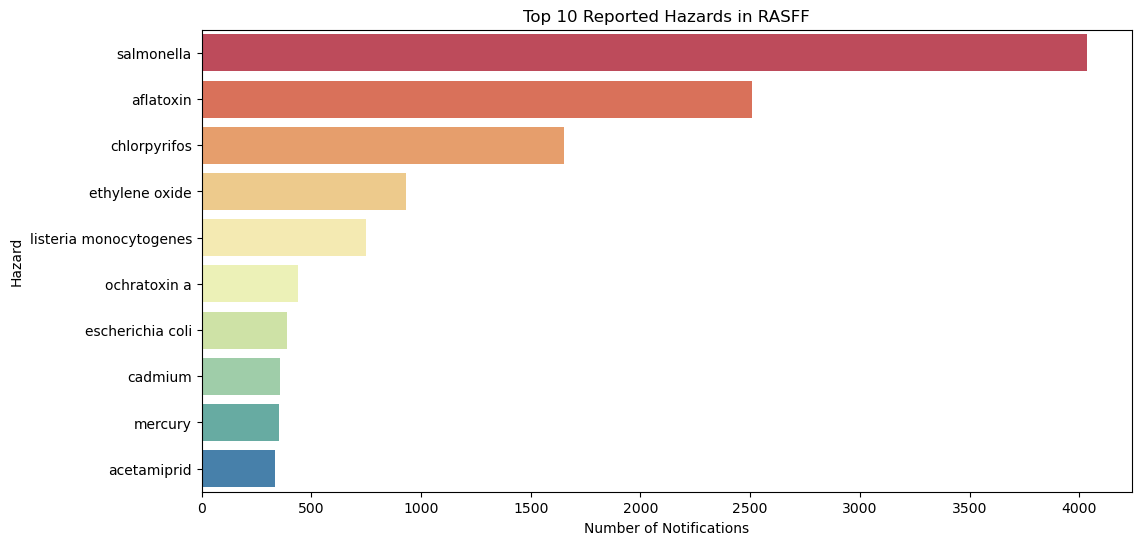

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

top_hazards = df['simplified_hazard'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_hazards.values, y=top_hazards.index, palette='Spectral')
plt.title("Top 10 Reported Hazards in RASFF")
plt.xlabel("Number of Notifications")
plt.ylabel("Hazard")
plt.show()


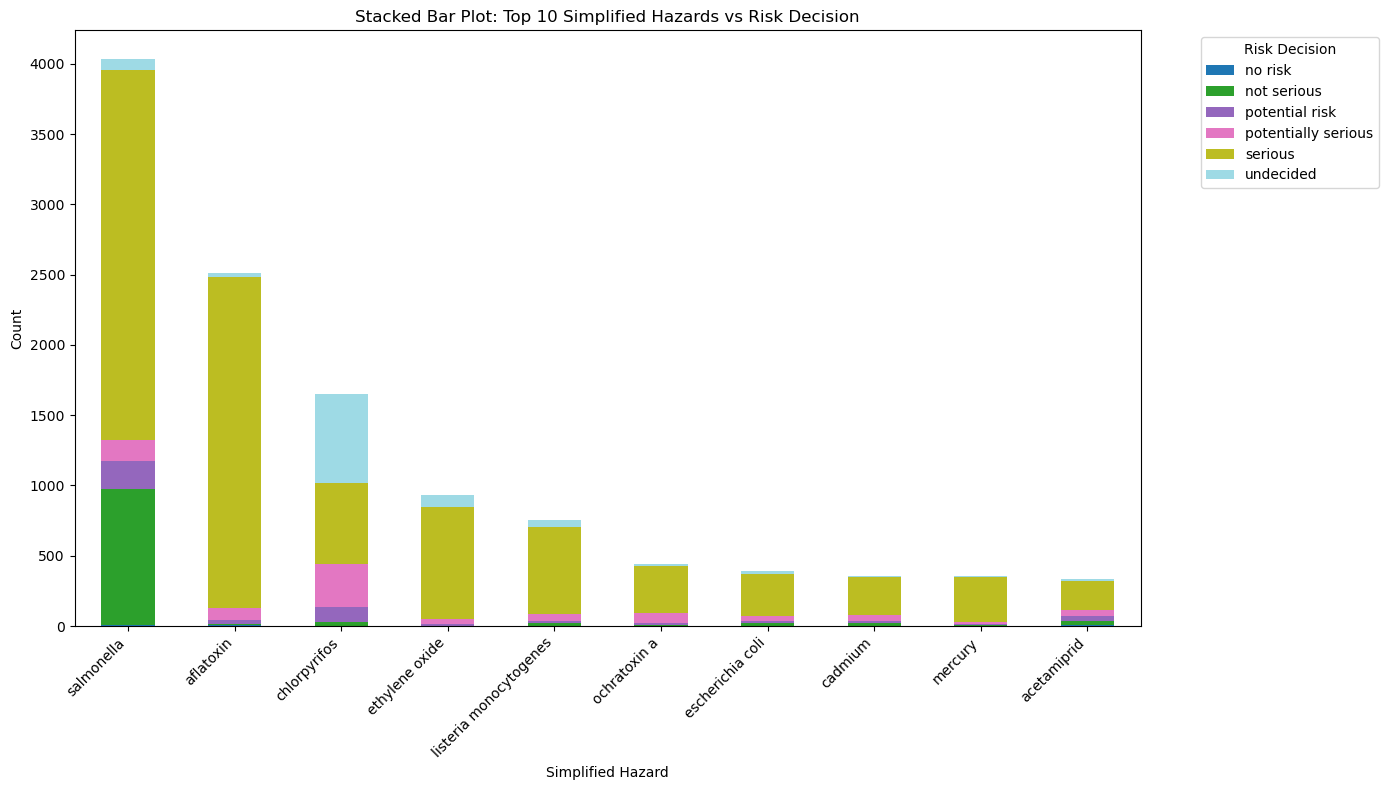

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Get top 10 simplified hazards by count ---
top10_hazards = df['simplified_hazard'].value_counts().nlargest(10).index

# --- 2. Filter dataframe to only top 10 simplified hazards ---
df_top10 = df[df['simplified_hazard'].isin(top10_hazards)]

# --- 3. Create cross-tab: hazard vs risk_decision ---
cross_tab = pd.crosstab(df_top10['simplified_hazard'], df_top10['risk_decision'])

# --- 4. Sort hazards by total count descending (left → right) ---
cross_tab['total'] = cross_tab.sum(axis=1)
cross_tab = cross_tab.sort_values('total', ascending=False)
cross_tab = cross_tab.drop(columns='total')

# --- 5. Plot stacked bar chart ---
cross_tab.plot(kind='bar', stacked=True, figsize=(14,8), colormap='tab20')

plt.ylabel("Count")
plt.xlabel("Simplified Hazard")
plt.title("Stacked Bar Plot: Top 10 Simplified Hazards vs Risk Decision")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Risk Decision', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

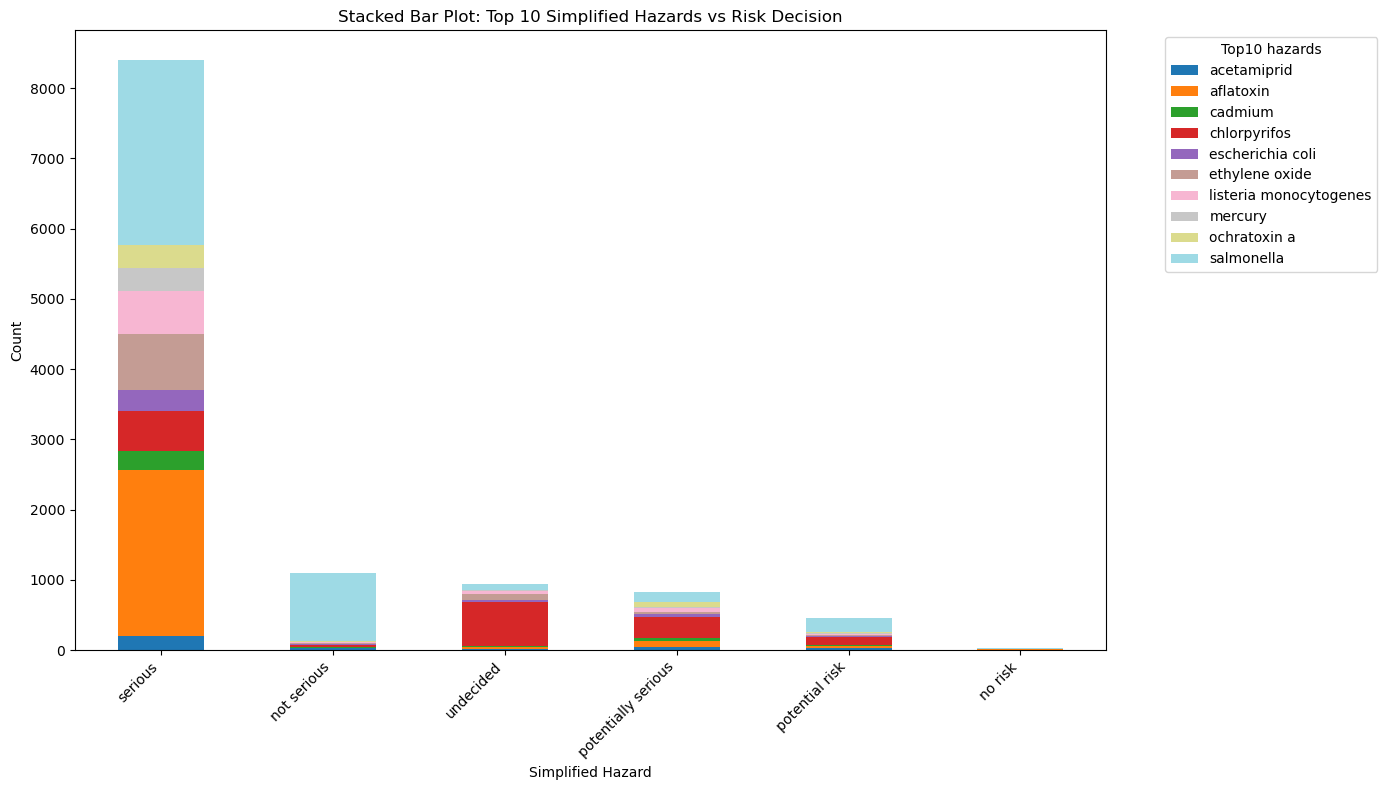

In [28]:
# --- 3. Create cross-tab: hazard vs risk_decision ---
cross_tab = pd.crosstab(df_top10['risk_decision'], df_top10['simplified_hazard'])

# --- 4. Sort hazards by total count descending (left → right) ---
cross_tab['total'] = cross_tab.sum(axis=1)
cross_tab = cross_tab.sort_values('total', ascending=False)
cross_tab = cross_tab.drop(columns='total')

# --- 5. Plot stacked bar chart ---
cross_tab.plot(kind='bar', stacked=True, figsize=(14,8), colormap='tab20')

plt.ylabel("Count")
plt.xlabel("Simplified Hazard")
plt.title("Stacked Bar Plot: Top 10 Simplified Hazards vs Risk Decision")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Top10 hazards', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

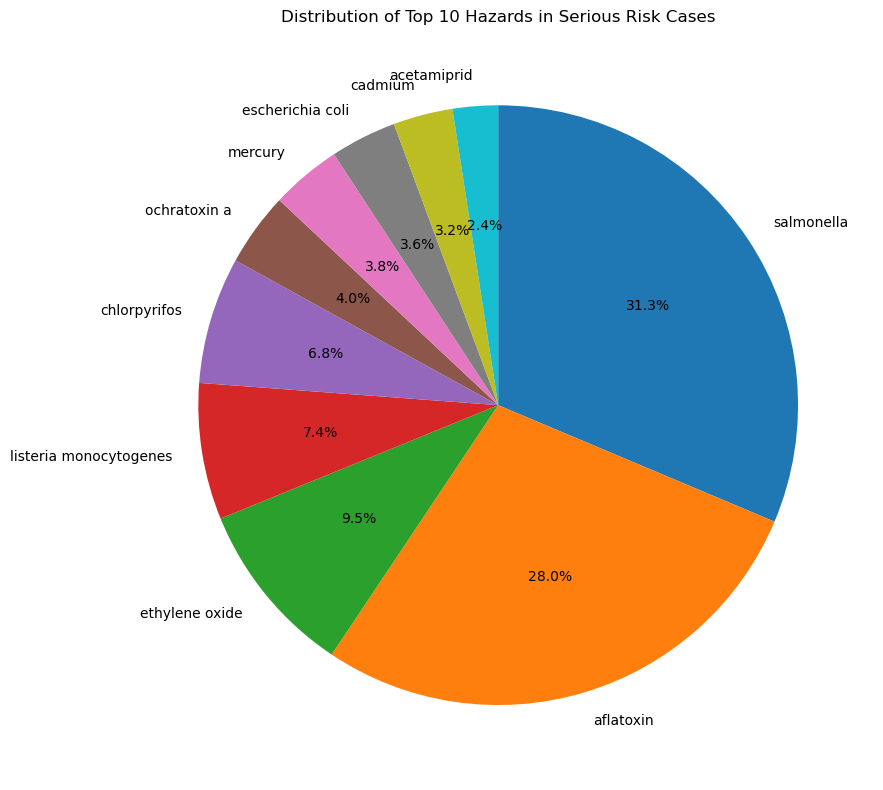

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Filter only "serious" cases ---
df_serious = df[df['risk_decision'] == 'serious']

# --- 2. Count hazard occurrences in serious category ---
hazard_counts = df_serious['simplified_hazard'].value_counts()

# --- 3. Select top 10 hazards ---
top10_hazards = hazard_counts.head(10)

# --- 4. Plot pie chart ---
plt.figure(figsize=(10, 8))
plt.pie(
    top10_hazards,
    labels=top10_hazards.index,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False
)

plt.title("Distribution of Top 10 Hazards in Serious Risk Cases")
plt.tight_layout()
plt.show()


In [29]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# ---------------------------
# 1. Load your dataframe
# ---------------------------
# df = your rasff dataframe
df = df.copy()

# ---------------------------
# 2. Preprocess simplified_hazard
# ---------------------------
df['simplified_hazard'] = df['simplified_hazard'].astype(str).str.strip()

# Replace empty strings or "[]" with NaN
df['simplified_hazard'] = df['simplified_hazard'].replace(['', '[]', 'nan', 'None'], np.nan)

# Fill missing hazards with placeholder
df['simplified_hazard'] = df['simplified_hazard'].fillna("unknown hazard")

# ---------------------------
# 3. Encode target variable (risk decision)
# ---------------------------
le = LabelEncoder()
df['risk_decision_encoded'] = le.fit_transform(df['risk_decision'])

y = df['risk_decision_encoded']

# ---------------------------
# 4. Convert simplified_hazard → numerical embeddings
# ---------------------------

# Load embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings (each becomes a 384-dim vector)
embeddings = model.encode(df['simplified_hazard'].tolist(), show_progress_bar=True)

# Convert to DataFrame
X = pd.DataFrame(embeddings)

# ---------------------------
# OPTIONAL: Add other numerical features
# X['category_encoded'] = LabelEncoder().fit_transform(df['category'])
# ---------------------------

# ---------------------------
# 5. Train-test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------
# 6. Train XGBoost
# ---------------------------
model_xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss'
)

model_xgb.fit(X_train, y_train)

# ---------------------------
# 7. Predictions & evaluation
# ---------------------------
y_pred = model_xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Batches:   0%|          | 0/857 [00:00<?, ?it/s]

Accuracy: 0.5733576642335766

Classification Report:
                      precision    recall  f1-score   support

            no risk       0.38      0.14      0.21        83
        not serious       0.55      0.18      0.27       827
     potential risk       0.34      0.08      0.12       538
potentially serious       0.43      0.11      0.18       474
            serious       0.61      0.92      0.73      2952
          undecided       0.38      0.30      0.34       606

           accuracy                           0.57      5480
          macro avg       0.45      0.29      0.31      5480
       weighted avg       0.53      0.57      0.50      5480



In [30]:
def recode_risk(risk):
    low_medium = ['no risk', 'not serious', 'potential risk', 'undecided', 'potentially serious']
    
    if risk in low_medium:
        return 0   # low to medium risk
    elif risk == 'serious':
        return 1   # high risk
    else:
        return -1  # unexpected category (should be small)


In [31]:
    
df['risk_binary'] = df['risk_decision'].apply(recode_risk)
df = df[df['risk_binary'] != -1]
df['risk_binary'].value_counts(dropna=False)

risk_binary
1    14756
0    12641
Name: count, dtype: int64

In [33]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# ---------------------------
# 1. Load your dataframe
# ---------------------------
# df = your rasff dataframe
df = df.copy()

# ---------------------------
# 2. Preprocess simplified_hazard
# ---------------------------
df['simplified_hazard'] = df['simplified_hazard'].astype(str).str.strip()

# Replace empty strings or "[]" with NaN
df['simplified_hazard'] = df['simplified_hazard'].replace(['', '[]', 'nan', 'None'], np.nan)

# Fill missing hazards with placeholder
df['simplified_hazard'] = df['simplified_hazard'].fillna("unknown hazard")

# ---------------------------
# 3.  target variable (risk decision)
# ---------------------------

y = df['risk_binary']

# ---------------------------
# 4. Convert simplified_hazard → numerical embeddings
# ---------------------------

# Load embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings (each becomes a 384-dim vector)
embeddings = model.encode(df['simplified_hazard'].tolist(), show_progress_bar=True)

# Convert to DataFrame
X = pd.DataFrame(embeddings)

# ---------------------------
# OPTIONAL: Add other numerical features
# X['category_encoded'] = LabelEncoder().fit_transform(df['category'])
# ---------------------------

# ---------------------------
# 5. Train-test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------
# 6. Train XGBoost
# ---------------------------
model_xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss'
)

model_xgb.fit(X_train, y_train)

# ---------------------------
# 7. Predictions & evaluation
# ---------------------------
y_pred = model_xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Batches:   0%|          | 0/857 [00:00<?, ?it/s]

Accuracy: 0.7297445255474453

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.73      0.71      2528
           1       0.76      0.73      0.74      2952

    accuracy                           0.73      5480
   macro avg       0.73      0.73      0.73      5480
weighted avg       0.73      0.73      0.73      5480

